# Data analyst

## Load libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## Load data

In [2]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

PROC_DATA_PATH = ROOT_PATH + '\\data\\proc\\'

In [3]:
signals = pd.read_excel(PROC_DATA_PATH + 'measure1_wifi_smartphone.xlsx', index_col=0)
signals

,place_id,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ,x,y
3,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.2,-33.3,1.2,0.6
6,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.8,-33.3,1.2,0.6
7,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.3,1.2,0.6
9,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.7,1.2,0.6
14,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.0,-1.2,-33.7,1.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-37.2,-19.6,32.4,34.2
11446,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-36.8,-19.6,32.4,34.2
11447,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-36.8,-20.0,32.4,34.2
11448,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.5,-36.8,-20.0,32.4,34.2


## Split labels and features

In [4]:
# X = m1_wifi_df.iloc[:,:-2]
# y = m1_wifi_df.iloc[:,-2:]

X = signals.iloc[:,1:-2]
y = signals.iloc[:,-2:]

### Standarize

In [5]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X = pd.DataFrame(std.transform(X), columns=X.columns)

## Split train test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle           

X, y = shuffle(X, y, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=44)

## Build the model

In [14]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#Running multiple models with Pipeline
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "Linear Regression",
        Pipeline(
            steps=[
                ("lin_reg", LinearRegression(n_jobs=-1)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "KNeighbors",
        Pipeline(
            steps=[
                ("knn", KNeighborsRegressor(n_jobs=-1)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "Gradient Boosting wrapped",
        Pipeline(
            steps=[
                ("gradient_boosting", MultiOutputRegressor(
                                                            LinearSVR())
                ),
            ]
        ),
        {}
    )
)
models.append(
    (
        "Extra Tree",
        Pipeline(
            steps=[
                ("ExTree", ExtraTreesRegressor()),
            ]
        ),
        {}
    )
)

models.append(
    (
        "Decision Tree",
        Pipeline(
            steps=[
                ("decision_tree", DecisionTreeRegressor(random_state=42)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "Random Forest",
        Pipeline(
            steps=[
                ("random_forest", RandomForestRegressor(random_state=42,n_jobs=-1)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "Gradient Boosting wrapped",
        Pipeline(
            steps=[
                ("gradient_boosting", MultiOutputRegressor(
                                                            GradientBoostingRegressor(random_state=42))
                ),
            ]
        ),
        {}
    )
)
models.append(
    (
        "XGB wrapped",
        Pipeline(
            steps=[
                ("xgboost", MultiOutputRegressor(
                            XGBRegressor(random_state=42,eval_metric='logloss',n_jobs=-1))
                )
            ]
        ),
        {}
    )
)
models.append(
    (
        "Ridge",
        Pipeline(
            steps=[
                ("Ridge", Ridge(random_state=42)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "LASSO",
        Pipeline(
            steps=[
                ("lasso", Lasso(random_state=42)),
            ]
        ),
        {}
    )
)
models.append(
    (
        "LGBM wrapped",
        Pipeline(
            steps=[
                ("lgbm", MultiOutputRegressor(
                                                LGBMRegressor(random_state=42))
                ),
            ]
        ),
        {}
    )
)
models.append(
    (
        "CatBoost",
        Pipeline(
            steps=[
                ("cat", CatBoostRegressor(verbose=0,
                                          loss_function='MultiRMSE', 
                                          eval_metric='MultiRMSE')),
            ]
        ),
        {}
    )
)

print('Number of models to evaluate:', len(models))

# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)

for m in models:
    models_gridsearch[m[0]] = GridSearchCV(m[1],
                                          m[2],
                                          cv=cv,
                                          scoring="neg_mean_squared_error",
                                          verbose=1,
                                          n_jobs=-1)
    
    models_gridsearch[m[0]].fit(X_train, y_train)      




Number of models to evaluate: 12
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits


c:\src\theBridge\course-env\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\src\theBridge\course-env\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits


In [15]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
3,Extra Tree,-0.010199
4,Decision Tree,-0.038432
1,KNeighbors,-0.039871
5,Random Forest,-0.047538
10,CatBoost,-0.072469
6,XGB wrapped,-0.080796
9,LGBM wrapped,-0.094547
2,Gradient Boosting wrapped,-1.328357
7,Ridge,-5.731186
0,Linear Regression,-5.741624


### Deep learning

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model
model_NN = Sequential()
model_NN.add(Dense(1000, input_dim=130, kernel_initializer='he_uniform', activation='relu'))
model_NN.add(Dense(300, activation='relu'))
model_NN.add(Dense(2))
model_NN.compile(loss='mse',
              optimizer='adam',
              metrics = ['mae','mse'])

In [17]:
history = model_NN.fit(
    X_train,
    y_train,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
325/325 [==============================] - 4s 8ms/step - loss: 13.8661 - mae: 1.9423 - mse: 13.8661 - val_loss: 3.1858 - val_mae: 1.1168 - val_mse: 3.1858
Epoch 2/100
325/325 [==============================] - 2s 6ms/step - loss: 3.8987 - mae: 1.0951 - mse: 3.8987 - val_loss: 2.3889 - val_mae: 1.0576 - val_mse: 2.3889
Epoch 3/100
325/325 [==============================] - 2s 7ms/step - loss: 3.0281 - mae: 0.9166 - mse: 3.0281 - val_loss: 2.1159 - val_mae: 0.6783 - val_mse: 2.1159
Epoch 4/100
325/325 [==============================] - 2s 7ms/step - loss: 2.7508 - mae: 0.9371 - mse: 2.7508 - val_loss: 1.5689 - val_mae: 0.6427 - val_mse: 1.5689
Epoch 5/100
325/325 [==============================] - 2s 6ms/step - loss: 2.5723 - mae: 0.8832 - mse: 2.5723 - val_loss: 1.7483 - val_mae: 0.6864 - val_mse: 1.7483
Epoch 6/100
325/325 [==============================] - 1s 4ms/step - loss: 1.9687 - mae: 0.6902 - mse: 1.9687 - val_loss: 1.1589 - val_mae: 0.5707 - val_mse: 1.1589
Epoch 7/

In [18]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,13.866145,1.942257,13.866145,3.185843,1.116757,3.185843,0
1,3.898734,1.095088,3.898734,2.388912,1.057603,2.388912,1
2,3.028092,0.916587,3.028092,2.115941,0.678300,2.115941,2
3,2.750753,0.937147,2.750753,1.568861,0.642749,1.568861,3
4,2.572251,0.883196,2.572251,1.748312,0.686448,1.748312,4
5,1.968746,0.690231,1.968746,1.158897,0.570661,1.158897,5
6,2.002284,0.734104,2.002284,1.212116,0.597377,1.212116,6
7,2.294358,0.854344,2.294358,1.759014,0.650032,1.759014,7
8,1.774318,0.679743,1.774318,2.288014,0.811177,2.288014,8
9,1.849074,0.750532,1.849074,1.212826,0.643490,1.212826,9


In [19]:
df_hist['val_mae'].min()

0.22348769009113312

In [20]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

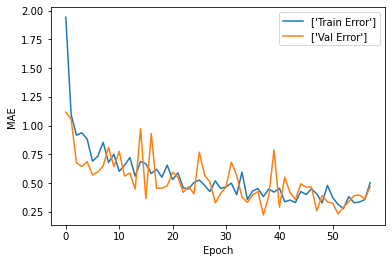

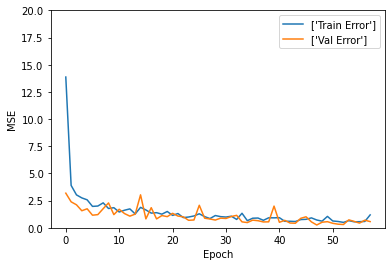

In [21]:
plot_history(history)

### Comparation of all models

In [22]:
best_models = best_grids.copy()
best_models.loc[len(best_models.index)] = ['NN', -df_hist['val_mae'].min()]
best_models = best_models.sort_values(by="Best score", ascending=False)
best_models.head(len(best_grids.index))

,Grid,Best score
3,Extra Tree,-0.010199
4,Decision Tree,-0.038432
1,KNeighbors,-0.039871
5,Random Forest,-0.047538
10,CatBoost,-0.072469
6,XGB wrapped,-0.080796
9,LGBM wrapped,-0.094547
11,NN,-0.223488
2,Gradient Boosting wrapped,-1.328357
7,Ridge,-5.731186


In [23]:
best_models.to_excel(ROOT_PATH + '\\data\\metrics\\models_score.xlsx')

## Tune hyperparameters

In [24]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [25]:
extratree = Pipeline([
                ("extratree",ExtraTreesRegressor())
               ])

neighbors = Pipeline([
                ("neighbors",KNeighborsRegressor())
               ])


decisionTree = Pipeline([
                    ("decisionTree",DecisionTreeRegressor())
                   ])

# Extra Tree
grid_extraTree = {"extratree__max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }

# KNN
grid_neighbors = {"neighbors__n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "neighbors__weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino
                  }

# ARBOL DE DECISION
grid_decisionTree = {"decisionTree__max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }




In [26]:
# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('Extra Trees Regressor', extratree, grid_extraTree),
            ('KNeighbors Regressor', neighbors, grid_neighbors),
            ('Decision Tree Regressor', decisionTree, grid_decisionTree),
         ]

# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for m in models:
    models_gridsearch[m[0]] = GridSearchCV(m[1],
                                          m[2],
                                          cv=5,
                                          scoring="neg_mean_squared_error",
                                          verbose=1,
                                          n_jobs=-1)
    
    models_gridsearch[m[0]].fit(X_train, y_train)         

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [27]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
1,KNeighbors Regressor,-0.001288
0,Extra Trees Regressor,-0.159141
2,Decision Tree Regressor,-0.254597


In [28]:
# El mejor ha sido KNN
models_gridsearch['KNeighbors Regressor'].best_estimator_

Pipeline(steps=[('neighbors',
                 KNeighborsRegressor(n_neighbors=3, weights='distance'))])

## Test the model

In [29]:
# define model
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
# model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.predict(X_test))

[[20.4  4.8]
 [15.6  6. ]
 [31.2 29.4]
 ...
 [ 6.6  6. ]
 [27.6  6. ]
 [36.  17.4]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
i = 150
# test = X_test.iloc[i:i+1, :]
print(f'Real point {y_test.iloc[i:i+1, :]}')
print(f'Point predicted {model.predict(X_test.iloc[i:i+1:, :])}')

Real point          x    y
6520  19.8  7.8
Point predicted [[19.8  7.8]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
print("MSE:  %.7f " % mean_squared_error(y_test, predictions))
print("RMSE: %.5f " % np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:  %.5f " % mean_absolute_error(y_test, predictions))

c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


MSE:  0.0000004 
RMSE: 0.00064 
MAE:  0.00002 


## Save model

In [32]:
import pickle

with open(ROOT_PATH + '\\model\selected_models\\KNeighborsRegressor_nb.model', "wb") as archivo_salida:
    pickle.dump(model, archivo_salida)

In [33]:
# Para volver a leer el modelo
with open(ROOT_PATH + '\\model\selected_models\\KNeighborsRegressor_nb.model', "rb") as archivo_entrada:
    import_model = pickle.load(archivo_entrada)
    
print(import_model)

KNeighborsRegressor(n_neighbors=3, weights='distance')
